In [1]:
#%tensorflow_version 1.x 
#!pip install tensorflow-hub

In [22]:
import tensorflow_hub as hub
import tensorflow as tf
from keras import backend as K

import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt

import urllib.request


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
#https://www.kaggle.com/uciml/sms-spam-collection-dataset

In [43]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/reejungkim/Natural-Language-Processing/master/spam.csv", filename="spam.csv")
data = pd.read_csv('spam.csv',encoding='latin1')
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [44]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data[:5]

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
data.drop_duplicates(subset=['v2'], inplace=True)

In [46]:
data.v1.isnull().sum()

0

# tokenization

In [47]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data.v2)
sequences = tokenizer.texts_to_sequences(data.v2) 

In [48]:
X_data = sequences

In [49]:
word_to_index = tokenizer.word_index

In [50]:
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'call': 17,
 'that': 18,
 'on': 19,
 '2': 20,
 'are': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'at': 27,
 'or': 28,
 "i'm": 29,
 'do': 30,
 'be': 31,
 'get': 32,
 'will': 33,
 'just': 34,
 'if': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 'gt': 42,
 'lt': 43,
 '4': 44,
 'how': 45,
 'when': 46,
 'go': 47,
 'from': 48,
 'ok': 49,
 'out': 50,
 'all': 51,
 'what': 52,
 'free': 53,
 'know': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'come': 59,
 'am': 60,
 'was': 61,
 'time': 62,
 'its': 63,
 'only': 64,
 'day': 65,
 'want': 66,
 'love': 67,
 'there': 68,
 'he': 69,
 'text': 70,
 'send': 71,
 'going': 72,
 'one': 73,
 'need': 74,
 'by': 75,
 'lor': 76,
 'home': 77,
 'as': 78,
 'about': 79,
 'still': 80,
 'see': 81,
 'txt': 82,
 'back': 83,
 'r': 84,
 'sto

# padding

In [51]:
vocab_size = len(word_to_index) + 1
print('number of vocabs in the dict: {}'.format((vocab_size)))

number of vocabs in the dict: 8921


In [54]:
max_len = 189
# 전체 데이터셋의 길이는 max_len으로 맞춥니다.
X_data = pad_sequences(X_data, maxlen = max_len)
print("data(shape): ", X_data.shape)

data(shape):  (5169, 189)


# model 

In [55]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_data, 
                                                    data.v1,
                                                    test_size=0.2, 
                                                    random_state=0)

In [56]:
np.array(X_train).shape, np.array(y_train).shape

((4135, 189), (4135,))

In [39]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [57]:
model = Sequential()
model.add(Embedding(vocab_size, 32)) # 임베딩 벡터의 차원은 32
model.add(SimpleRNN(32)) # RNN 셀의 hidden_size는 32
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, np.array(y_train), epochs=4, batch_size=64, validation_split=0.2)

Train on 3308 samples, validate on 827 samples
Epoch 1/4
3308/3308 [==============================] - 7s 2ms/sample - loss: 0.5366 - acc: 0.7391 - val_loss: 0.3727 - val_acc: 0.8670
Epoch 2/4
3308/3308 [==============================] - 5s 2ms/sample - loss: 0.2945 - acc: 0.9129 - val_loss: 0.2101 - val_acc: 0.9480
Epoch 3/4
3308/3308 [==============================] - 5s 1ms/sample - loss: 0.1263 - acc: 0.9719 - val_loss: 0.1085 - val_acc: 0.9734
Epoch 4/4
3308/3308 [==============================] - 5s 1ms/sample - loss: 0.0630 - acc: 0.9843 - val_loss: 0.0934 - val_acc: 0.9734


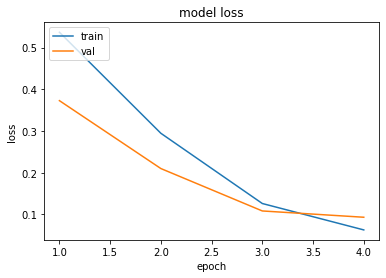

In [58]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [59]:
print("\n model accuracy: %.4f" % (model.evaluate(X_test, np.array(y_test)))[1])

1034/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


 model accuracy: 0.9758
